In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from scipy import stats

In [2]:
data = pd.read_csv('hr_sp_customers_1_year.dsv', sep=';', low_memory=False)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2765 entries, 0 to 2764
Data columns (total 10 columns):
CUSTOMER_ID         2765 non-null int64
ORDERS              2765 non-null int64
FIRST_ORDER_DATE    2765 non-null object
LAST_ORDER_DATE     2765 non-null object
TOTAL_CM2           2765 non-null object
NET_SALES           2765 non-null object
CM2_REL             2765 non-null object
ZTQ_ID              2765 non-null int64
START_DATE          2765 non-null object
EXPIRY_DATE         2765 non-null object
dtypes: int64(3), object(7)
memory usage: 216.1+ KB


In [4]:
data['CM2_REL'] = [i.replace(',', '.') for i in data['CM2_REL']]
data['NET_SALES'] = [i.replace(',', '.') for i in data['NET_SALES']]
data['TOTAL_CM2'] = [i.replace(',', '.') for i in data['TOTAL_CM2']]

In [5]:
data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']] = data[['TOTAL_CM2', 'NET_SALES', 'CM2_REL']].astype(float)

In [6]:
data['FIRST_ORDER_DATE'] = pd.to_datetime(data['FIRST_ORDER_DATE'], format='%d/%m/%y')

In [7]:
data['LAST_ORDER_DATE'] = pd.to_datetime(data['LAST_ORDER_DATE'], format='%d/%m/%y')

In [8]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], format='%d/%m/%y')

In [9]:
data['EXPIRY_DATE'] = pd.to_datetime(data['EXPIRY_DATE'], format='%d/%m/%y')

In [10]:
data.head()

,CUSTOMER_ID,ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE,TOTAL_CM2,NET_SALES,CM2_REL,ZTQ_ID,START_DATE,EXPIRY_DATE
0,10210235,7,2017-07-23,2018-05-31,46.4410,411.3752,11.29,54,2015-11-22,2018-11-22
1,11419504,20,2017-06-04,2018-05-23,135.5395,1290.0137,10.51,52,2016-06-17,2019-06-17
2,9718221,25,2017-06-11,2018-05-23,77.1422,1043.8039,7.39,52,2016-06-24,2019-06-24
3,10498721,8,2017-07-25,2018-05-29,48.6802,410.0065,11.87,52,2016-07-08,2019-07-08
4,11810097,4,2017-06-23,2018-03-27,68.8578,487.5667,14.12,54,2016-08-21,2019-08-21


In [11]:
tiers = [51, 52, 53, 54, 55, 56]

...........................................................TIER  51 ..........................................................


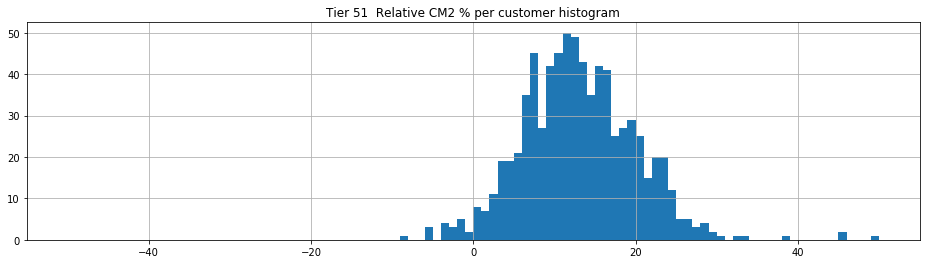

,CM2_REL
count,756.00
mean,13.03
std,6.99
min,-8.57
25%,8.28
50%,12.62
75%,17.40
max,49.94


CM2% threshold >= 5  is the percentile 10.85
CM2% threshold >= 7  is the percentile 18.25
CM2% threshold >=  9.54  is the percentile 30 allowing us to stay with the 70% of our sample


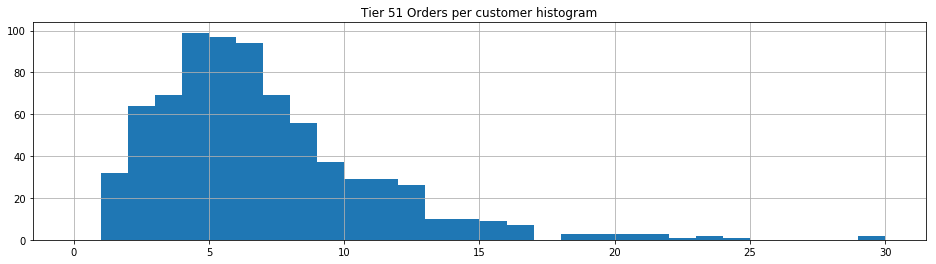

,ORDERS
count,756.00
mean,6.54
std,4.35
min,1.00
25%,4.00
50%,6.00
75%,8.00
max,49.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  70.24  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  64.42  % from our customers
With CM2% threshold >=  9.54  and Orders >=  4.0  we keep eligible a  55.29  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  52 ..........................................................


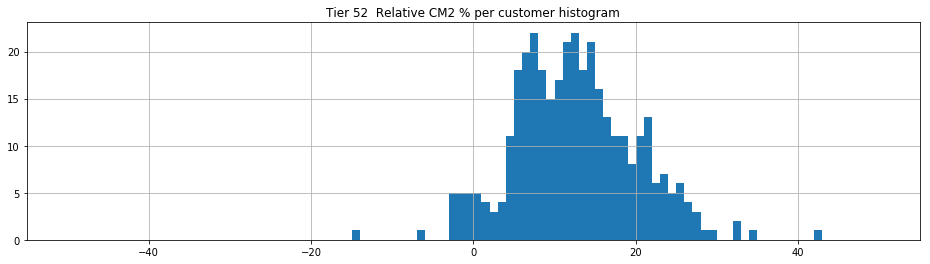

,CM2_REL
count,357.00
mean,11.45
std,21.87
min,-375.71
25%,7.30
50%,12.36
75%,17.13
max,42.64


CM2% threshold >= 5  is the percentile 12.61
CM2% threshold >= 7  is the percentile 23.25
CM2% threshold >=  8.068  is the percentile 30 allowing us to stay with the 70% of our sample


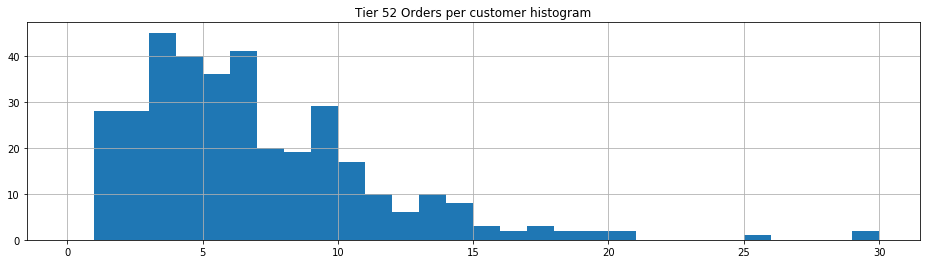

,ORDERS
count,357.00
mean,6.69
std,5.28
min,1.00
25%,3.00
50%,6.00
75%,9.00
max,40.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  64.99  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  56.86  % from our customers
With CM2% threshold >=  8.068  and Orders >=  4.0  we keep eligible a  51.54  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  53 ..........................................................


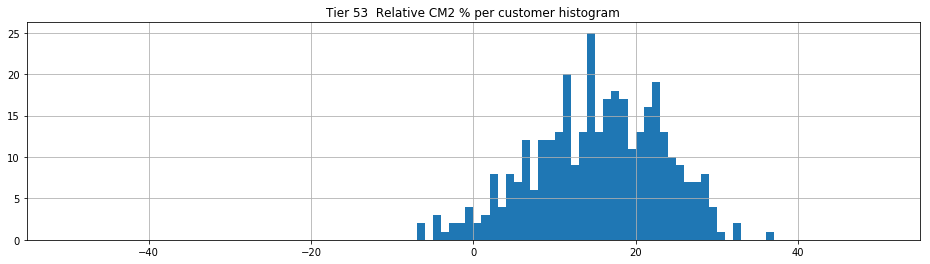

,CM2_REL
count,354.00
mean,15.30
std,7.99
min,-6.33
25%,10.12
50%,15.57
75%,21.39
max,36.46


CM2% threshold >= 5  is the percentile 11.02
CM2% threshold >= 7  is the percentile 16.38
CM2% threshold >=  11.316999999999998  is the percentile 30 allowing us to stay with the 70% of our sample


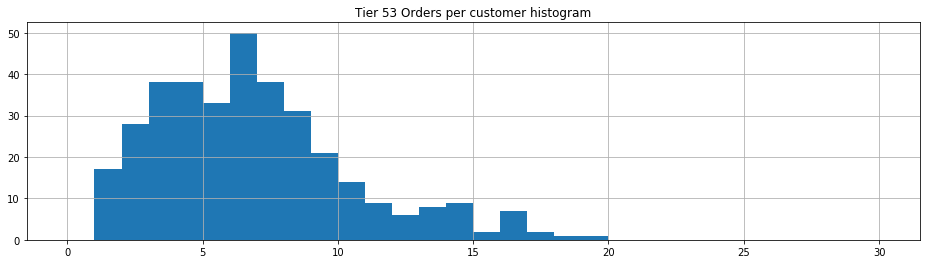

,ORDERS
count,354.00
mean,6.48
std,3.91
min,1.00
25%,4.00
50%,6.00
75%,8.00
max,32.00


4.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  4.0  we keep eligible a  69.49  % from our customers
With CM2% threshold >= 7 and Orders >=  4.0  we keep eligible a  64.97  % from our customers
With CM2% threshold >=  11.316999999999998  and Orders >=  4.0  we keep eligible a  55.08  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  54 ..........................................................


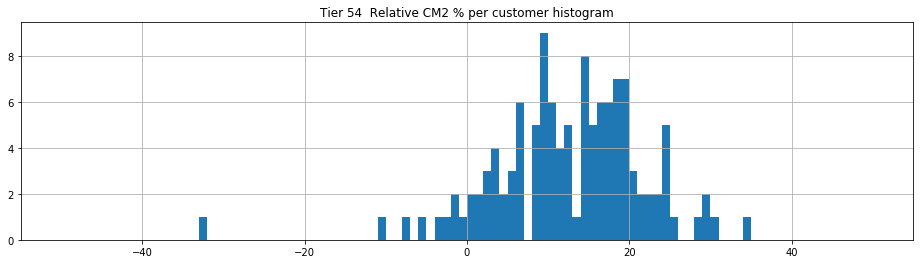

,CM2_REL
count,120.00
mean,12.41
std,9.35
min,-32.77
25%,6.97
50%,13.09
75%,18.31
max,34.57


CM2% threshold >= 5  is the percentile 18.33
CM2% threshold >= 7  is the percentile 25.83
CM2% threshold >=  8.972999999999997  is the percentile 30 allowing us to stay with the 70% of our sample


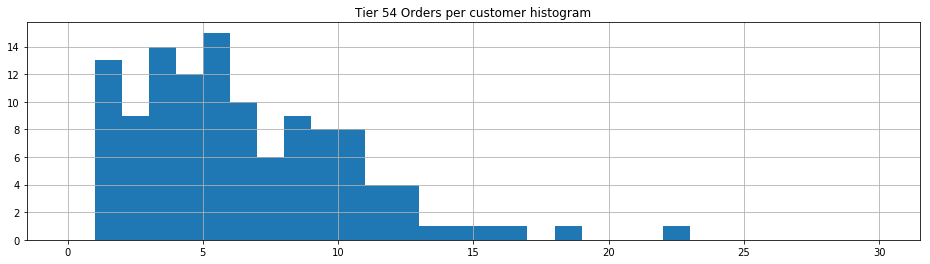

,ORDERS
count,120.00
mean,6.61
std,5.94
min,1.00
25%,3.00
50%,5.00
75%,9.00
max,44.00


3.6999999999999957  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.6999999999999957  we keep eligible a  57.5  % from our customers
With CM2% threshold >= 7 and Orders >=  3.6999999999999957  we keep eligible a  52.5  % from our customers
With CM2% threshold >=  8.972999999999997  and Orders >=  3.6999999999999957  we keep eligible a  50.0  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  55 ..........................................................


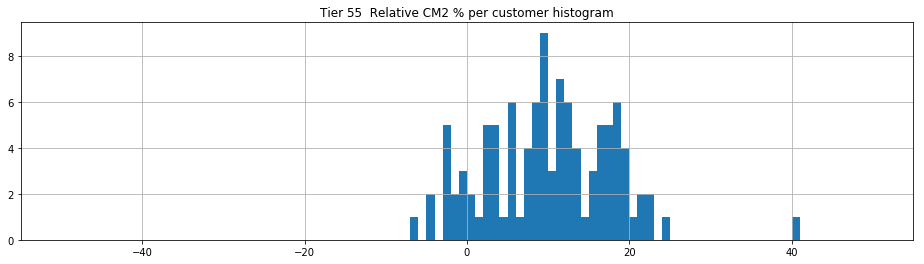

,CM2_REL
count,104.00
mean,9.99
std,7.87
min,-6.23
25%,3.97
50%,9.83
75%,16.22
max,40.63


CM2% threshold >= 5  is the percentile 25.96
CM2% threshold >= 7  is the percentile 32.69
CM2% threshold >=  5.224  is the percentile 30 allowing us to stay with the 70% of our sample


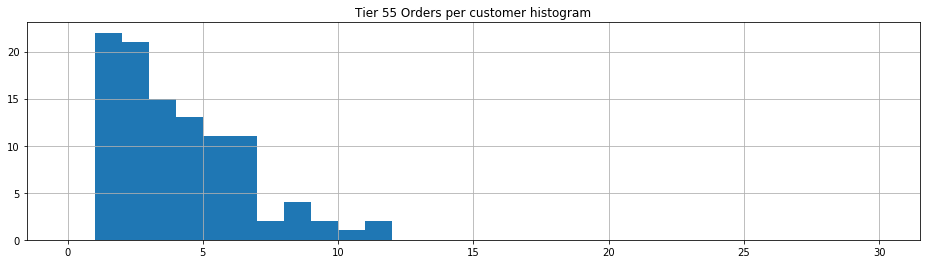

,ORDERS
count,104.00
mean,3.63
std,2.42
min,1.00
25%,2.00
50%,3.00
75%,5.00
max,11.00


2.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  2.0  we keep eligible a  58.65  % from our customers
With CM2% threshold >= 7 and Orders >=  2.0  we keep eligible a  53.85  % from our customers
With CM2% threshold >=  5.224  and Orders >=  2.0  we keep eligible a  55.77  % from our customers
                                                                                                                    
                                                                                                                    
...........................................................TIER  56 ..........................................................


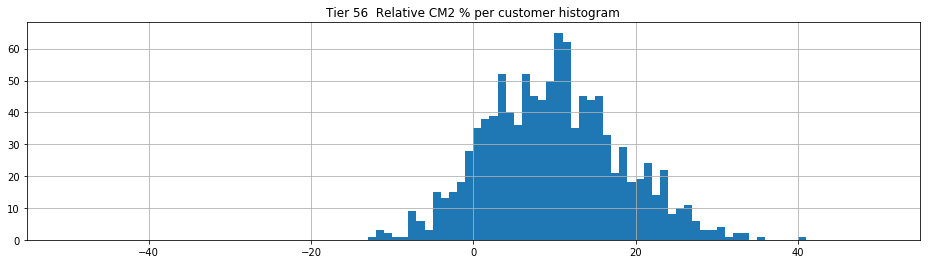

,CM2_REL
count,1074.00
mean,9.86
std,8.25
min,-12.65
25%,3.74
50%,9.74
75%,15.13
max,40.45


CM2% threshold >= 5  is the percentile 29.7
CM2% threshold >= 7  is the percentile 37.9
CM2% threshold >=  5.137  is the percentile 30 allowing us to stay with the 70% of our sample


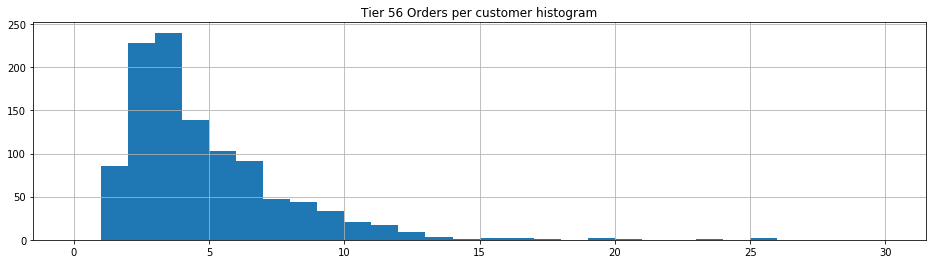

,ORDERS
count,1074.00
mean,4.34
std,3.12
min,1.00
25%,2.00
50%,3.00
75%,6.00
max,37.00


3.0  is the percentile 30 allowing us to stay with the 70% of our sample
                                                                                                                    
With CM2% threshold >= 5 and Orders >=  3.0  we keep eligible a  50.19  % from our customers
With CM2% threshold >= 7 and Orders >=  3.0  we keep eligible a  44.04  % from our customers
With CM2% threshold >=  5.137  and Orders >=  3.0  we keep eligible a  49.91  % from our customers
                                                                                                                    
                                                                                                                    


In [12]:
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    plt.figure(figsize=(16,4))
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50))
    title = 'Tier ' + str(tq) + '  Relative CM2 % per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['CM2_REL'].fillna(0).describe().round(2)))
    perc_30_cm2_rel = data_tier['CM2_REL'].fillna(0).quantile(.3)
    print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 5, kind='strict').round(2))
    print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data_tier['CM2_REL'], 7, kind='strict').round(2))
    print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    # CM2 € per customer
    #plt.figure(figsize=(16,4))
    #data_tier['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
    #title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
    #plt.title(title)
    #plt.show()
    #display(pd.DataFrame(data_tier['TOTAL_CM2'].describe().round(2)))
    #perc_30_cm2_abs = data_tier['TOTAL_CM2'].fillna(0).quantile(.3)
    #val1 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val2 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #val3 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    #print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    #print('                                                                                                                    ')
    #print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
    #print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
    #print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
    # Orders per customer
    plt.figure(figsize=(16,4))
    data_tier['ORDERS'].hist(bins=30, range=(0, 30))
    title = 'Tier ' + str(tq) + ' Orders per customer histogram'
    plt.title(title)
    plt.show()
    display(pd.DataFrame(data_tier['ORDERS'].describe().round(2)))
    perc_30_orders = data_tier['ORDERS'].quantile(.3)
    val4 = float(data_tier[(data_tier['CM2_REL'] >= 5) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val5 = float(data_tier[(data_tier['CM2_REL'] >= 7) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    val6 = float(data_tier[(data_tier['CM2_REL'] >= perc_30_cm2_rel) & (data_tier['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data_tier['CUSTOMER_ID'].nunique() * 100
    print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
    print('                                                                                                                    ')
    print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
    print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
    print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
    print('                                                                                                                    ')
    print('                                                                                                                    ')

In [13]:
data['NET_BASKET_VALUE'] = data['NET_SALES'] / data['ORDERS']

In [14]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['NET_BASKET_VALUE'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,481.0,56.719542,22.701085,21.213100,41.413537,51.446643,66.496443,207.143467
52,202.0,68.660720,31.577408,22.297625,46.658023,59.834970,80.968375,217.591580
53,225.0,60.665325,28.829514,25.886440,42.319200,54.925175,70.164237,284.590629
54,68.0,70.356260,35.049977,34.694925,46.191145,58.729680,82.188547,224.519117
55,44.0,49.680395,16.450207,24.825617,36.957390,44.423484,56.796680,93.503300
56,478.0,54.130132,23.025653,19.724725,39.572092,48.298907,62.169543,185.385617


In [15]:
data[(data['ORDERS'] >= 4) & (data['ORDERS'] <= 10)].groupby('ZTQ_ID')['CM2_REL'].describe()

,count,mean,std,min,25%,50%,75%,max
ZTQ_ID,,,,,,,,
51,481.0,13.097131,6.811040,-5.02,8.6600,12.940,17.1200,45.09
52,202.0,12.997921,7.381188,-6.39,7.6550,12.375,17.3725,42.64
53,225.0,16.197156,7.202768,-6.33,11.3300,16.190,21.3800,36.46
54,68.0,13.300294,7.650218,-10.06,9.2275,14.590,18.1650,29.84
55,44.0,10.282045,6.194849,-2.70,5.2150,10.180,15.7700,21.62
56,478.0,9.960983,7.627469,-7.37,3.8925,10.045,15.0800,32.84


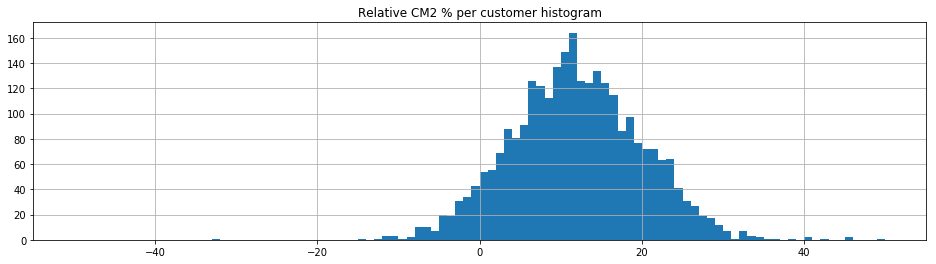

,CM2_REL
count,2765.00
mean,11.75
std,10.92
min,-375.71
25%,6.48
50%,11.67
75%,17.11
max,49.94


CM2% threshold >= 5  is the percentile 19.31
CM2% threshold >= 6  is the percentile 22.6
CM2% threshold >= 7  is the percentile 27.16
CM2% threshold >= 8  is the percentile 31.57
CM2% threshold >= 9  is the percentile 35.62
CM2% threshold >= 10  is the percentile 40.58
CM2% threshold >=  7.671999999999999  is the percentile 30 allowing us to stay with the 70% of our sample


In [16]:
# CM2% per customer
plt.figure(figsize=(16,4))
data['CM2_REL'].hist(bins=100, range=(-50, 50))
title = 'Relative CM2 % per customer histogram'
plt.title(title)
plt.show()
display(pd.DataFrame(data['CM2_REL'].fillna(0).describe().round(2)))
perc_30_cm2_rel = data['CM2_REL'].fillna(0).quantile(.3)
print('CM2% threshold >= 5  is the percentile', stats.percentileofscore(data['CM2_REL'], 5, kind='strict').round(2))
print('CM2% threshold >= 6  is the percentile', stats.percentileofscore(data['CM2_REL'], 6, kind='strict').round(2))
print('CM2% threshold >= 7  is the percentile', stats.percentileofscore(data['CM2_REL'], 7, kind='strict').round(2))
print('CM2% threshold >= 8  is the percentile', stats.percentileofscore(data['CM2_REL'], 8, kind='strict').round(2))
print('CM2% threshold >= 9  is the percentile', stats.percentileofscore(data['CM2_REL'], 9, kind='strict').round(2))
print('CM2% threshold >= 10  is the percentile', stats.percentileofscore(data['CM2_REL'], 10, kind='strict').round(2))
print('CM2% threshold >= ', perc_30_cm2_rel, ' is the percentile 30 allowing us to stay with the 70% of our sample')
# CM2 € per customer
#plt.figure(figsize=(16,4))
#data['TOTAL_CM2'].hist(bins=200, range=(-50, 150))
#title = 'Tier ' + str(tq) + ' Absolute CM2 per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['TOTAL_CM2'].describe().round(2)))
#perc_30_cm2_abs = data['TOTAL_CM2'].fillna(0).quantile(.3)
#val1 = float(data[(data['CM2_REL'] >= 5) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val2 = float(data[(data['CM2_REL'] >= 7) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val3 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['TOTAL_CM2'] >= perc_30_cm2_abs)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_cm2_abs, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val1, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val2, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and CM2 >= ', perc_30_cm2_abs, ' we keep eligible a ', np.round(val3, 2), ' % from our customers')
# Orders per customer
#plt.figure(figsize=(16,4))
#data['ORDERS'].hist(bins=30, range=(0, 30))
#title = 'Tier ' + str(tq) + ' Orders per customer histogram'
#plt.title(title)
#plt.show()
#display(pd.DataFrame(data['ORDERS'].describe().round(2)))
#perc_30_orders = data['ORDERS'].quantile(.3)
#val4 = float(data[(data['CM2_REL'] >= 5) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val5 = float(data[(data['CM2_REL'] >= 7) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#val6 = float(data[(data['CM2_REL'] >= perc_30_cm2_rel) & (data['ORDERS'] >= perc_30_orders)]['CUSTOMER_ID'].nunique()) / data['CUSTOMER_ID'].nunique() * 100
#print(perc_30_orders, ' is the percentile 30 allowing us to stay with the 70% of our sample')
#print('                                                                                                                    ')
#print('With CM2% threshold >= 5 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val4, 2), ' % from our customers')
#print('With CM2% threshold >= 7 and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val5, 2), ' % from our customers')
#print('With CM2% threshold >= ', perc_30_cm2_rel, ' and Orders >= ', perc_30_orders, ' we keep eligible a ', np.round(val6, 2), ' % from our customers')
#print('                                                                                                                    ')
#print('                                                                                                                    ')

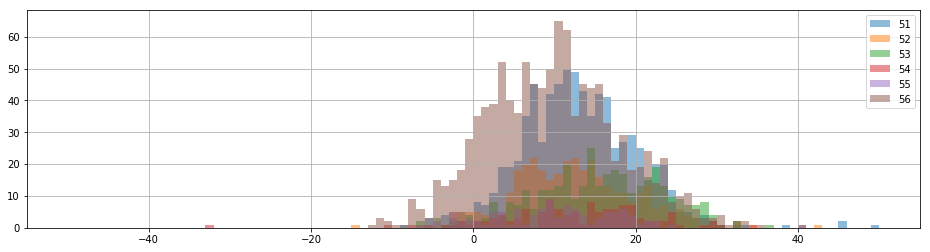

In [17]:
plt.figure(figsize=(16,4))
for tq in tiers:
    data_tier = data[data['ZTQ_ID'] == tq]
    #print('...........................................................TIER ', tq, '..........................................................')
    # CM2% per customer
    data_tier['CM2_REL'].hist(bins=100, range=(-50, 50), alpha=0.5)
    plt.legend([51, 52, 53, 54, 55, 56])
plt.show()   